In [1]:
import pandas as pd
import seaborn as sns
import pandas.testing as pd_testing

#import pandas.util.testing as tm
import matplotlib.pyplot as plt

In [2]:
# Initializing the dataframe
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#     Heatmap

<Axes: >

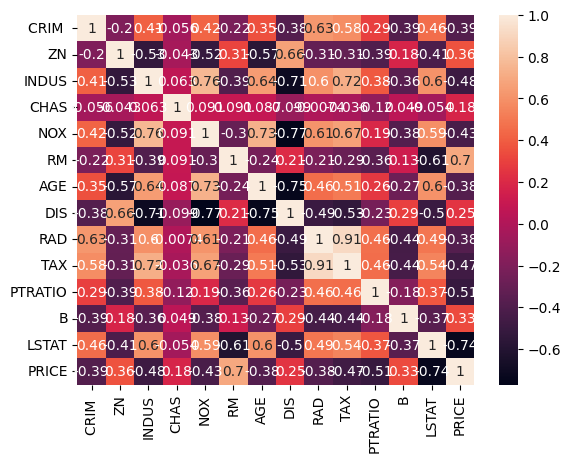

In [4]:
sns.heatmap(df.corr(),annot=True)

In [5]:
df.shape

(506, 14)

In [6]:
#Adding target variable to dataframe
#df['PRICE'] = df.target 
# Median value of owner-occupied homes in $1000s

In [7]:
df.columns

Index(['CRIM ', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [8]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [9]:
# Viewing the data statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Pairplot

<Axes: >

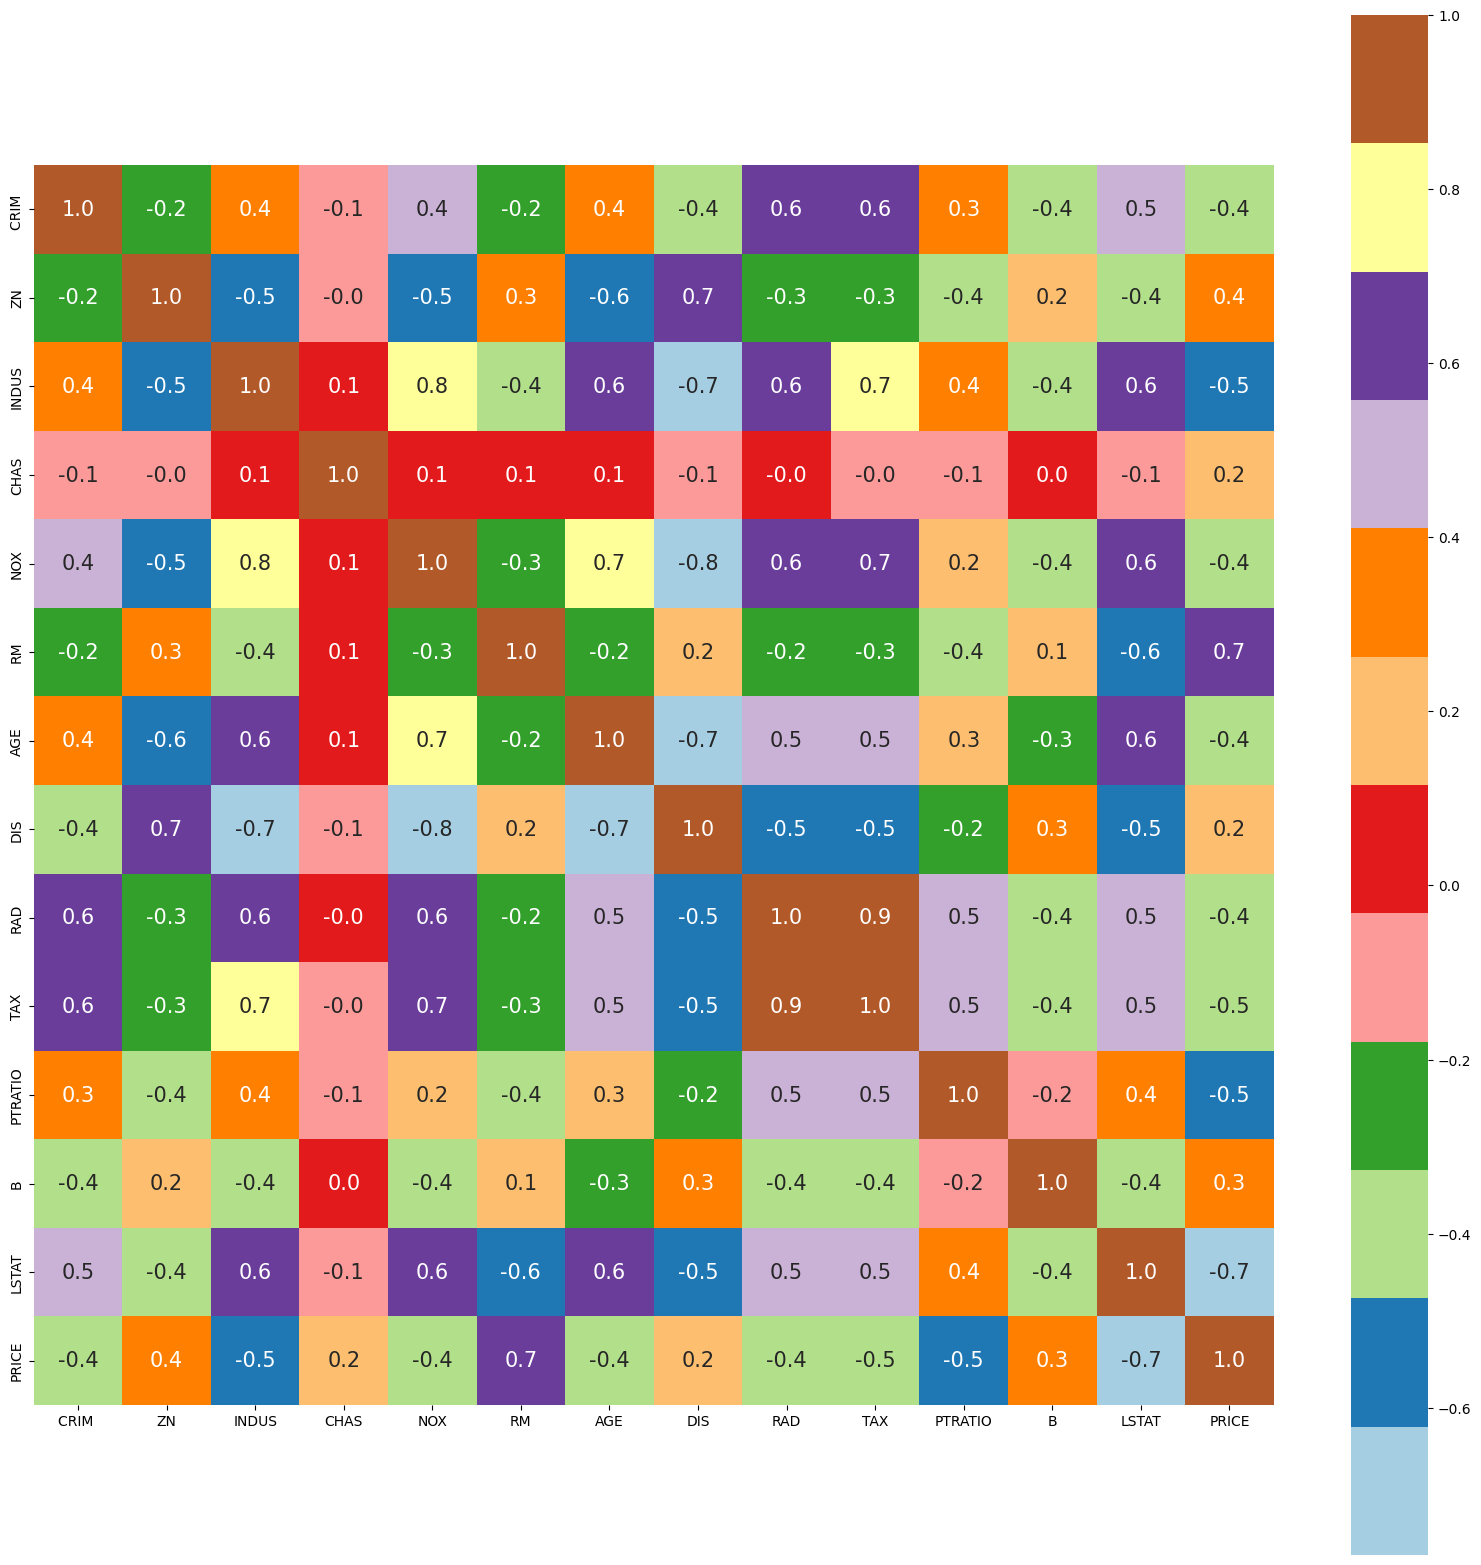

In [10]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Paired')


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df[['CRIM ', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                                                        'AGE', 'DIS', 'RAD', 'TAX',
                                    'PTRATIO', 'B', 'LSTAT']], df['PRICE'], test_size=0.3, random_state=109)

In [13]:
#Creating the model
linearRegr =  LinearRegression()
linearRegr.fit(X_train, y_train)
y_pred = linearRegr.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)


Mean Squared Error: 22.862416812850526
R-squared: 0.7161979270772525


In [ ]:
#Saving the Model
pickle_out = open("linearRegr_multi1_windows.pkl", "wb") 
pickle.dump(linearRegr, pickle_out) 
pickle_out.close()